# Exploring the data
* Importar los datasets
* Visualización inicial de los mismos
* Conteo de líneas de entrada por cadad uno.

## Importar los datasets

In [1]:
import pandas as pd
import json

In [2]:
with open('dataset/categories.json', encoding='utf-8')  as cat:
    categorias = json.load(cat)

In [3]:
with open('dataset/products.json', encoding='utf-8') as prod:
    products = json.load(prod)

In [4]:
with open('dataset/stores.json', encoding='utf-8')  as sto:
    stores = json.load(sto)

## Visualización inicial de los mismos

In [5]:
for i, prod in enumerate(products):
    if i == 2:
        break
    name = prod['name']
    print(f'\n¡¡¡¡Datos del producto {name}!!!!')
    for key, value in prod.items():
        print(key, ":", value)


¡¡¡¡Datos del producto Duracell - AAA Batteries (4-Pack)!!!!
sku : 43900
name : Duracell - AAA Batteries (4-Pack)
type : HardGood
price : 5.49
upc : 041333424019
category : [{'id': 'pcmcat312300050015', 'name': 'Connected Home & Housewares'}, {'id': 'pcmcat248700050021', 'name': 'Housewares'}, {'id': 'pcmcat303600050001', 'name': 'Household Batteries'}, {'id': 'abcat0208002', 'name': 'Alkaline Batteries'}]
shipping : 5.49
description : Compatible with select electronic devices; AAA size; DURALOCK Power Preserve technology; 4-pack
manufacturer : Duracell
model : MN2400B4Z
url : http://www.bestbuy.com/site/duracell-aaa-batteries-4-pack/43900.p?id=1051384074145&skuId=43900&cmp=RMXCC
image : http://img.bbystatic.com/BestBuy_US/images/products/4390/43900_sa.jpg

¡¡¡¡Datos del producto Duracell - AA 1.5V CopperTop Batteries (4-Pack)!!!!
sku : 48530
name : Duracell - AA 1.5V CopperTop Batteries (4-Pack)
type : HardGood
price : 5.49
upc : 041333415017
category : [{'id': 'pcmcat312300050015', 

In [6]:
for i, sto in enumerate(stores):
    if i == 2:
        break
    name = sto['name']
    print(f'\n¡¡¡¡Datos del store {name}!!!!')
    for key, value in sto.items():
        print(key, ":", value)


¡¡¡¡Datos del store Mall of America!!!!
id : 1000
type : BigBox
name : Mall of America
address : 340 W Market
address2 : 
city : Bloomington
state : MN
zip : 55425
location : {'lat': 44.85466, 'lon': -93.24565}
hours : Mon: 10-9:30; Tue: 10-9:30; Wed: 10-9:30; Thurs: 10-9:30; Fri: 10-9:30; Sat: 10-9:30; Sun: 11-7
services : ['Geek Squad Services', 'Best Buy Mobile', 'Best Buy For Business', 'Apple Shop', 'Hablamos Español', 'Camera Experience Shop ', 'Electronics Recycling', 'Magnolia Home Theater', 'Samsung Experience Shop', 'Windows Store']

¡¡¡¡Datos del store Tempe Marketplace!!!!
id : 1002
type : BigBox
name : Tempe Marketplace
address : 1900 E Rio Salado Pkwy
address2 : 
city : Tempe
state : AZ
zip : 85281
location : {'lat': 33.430729, 'lon': -111.89966}
hours : Mon: 10-9; Tue: 10-9; Wed: 10-9; Thurs: 10-9; Fri: 10-10; Sat: 10-10; Sun: 10-8
services : ['Windows Store', 'Geek Squad Services', 'Best Buy Mobile', 'Best Buy For Business', 'Apple Shop', 'Electronics Recycling', 'Sams

In [7]:
for i, cat in enumerate(categorias):
    if i == 2:
        break
    name = cat['name']
    print(f'\n¡¡¡¡Datos de la categoria {name}!!!!')
    for key, value in cat.items():
        print(key, ":", value)


¡¡¡¡Datos de la categoria Gift Ideas!!!!
id : abcat0010000
name : Gift Ideas
path : [{'id': 'abcat0010000', 'name': 'Gift Ideas'}]
subCategories : [{'id': 'pcmcat140000050035', 'name': 'Capturing Photos & Videos'}, {'id': 'pcmcat140000050036', 'name': 'Listening to Digital Music'}, {'id': 'pcmcat140000050037', 'name': 'Computing Made Easy'}, {'id': 'pcmcat140000050039', 'name': 'Simple GPS Navigation'}, {'id': 'pcmcat140000050040', 'name': 'Playing Video Games'}, {'id': 'pcmcat140000050041', 'name': 'Watching HDTV'}, {'id': 'pcmcat140000050042', 'name': 'Enjoying Favorite Movies'}, {'id': 'abcat0012000', 'name': 'Him'}, {'id': 'abcat0011000', 'name': 'Her'}, {'id': 'abcat0013000', 'name': 'Teens'}, {'id': 'abcat0014000', 'name': 'Kids'}, {'id': 'pcmcat84000050001', 'name': 'Anniversaries'}, {'id': 'pcmcat84000050004', 'name': 'Baby Showers'}, {'id': 'pcmcat94300050028', 'name': 'Birthdays'}, {'id': 'pcmcat84000050002', 'name': 'Business Gifts'}, {'id': 'pcmcat84000050003', 'name': 'Gr

## Conteo de líneas de entrada por cadad uno.

In [8]:
print(f" Cantidad de Productos {len(products)}\n Cantidad de Tiendas {len(stores)}\n cantidad de Categorías {len(categorias)}")

 Cantidad de Productos 51646
 Cantidad de Tiendas 1565
 cantidad de Categorías 4584


# Análisis de descripciones
* Conteo de caracteres, de palabras de oraciones y caracteres especiales.
* Normalización
* Conteo de palabras más frecuentes y palabras menos frecuentes.
* Conteo de ngramas más frecuentes y menos frecuentes
* Conteo de palabras de una sola letra

## Análisis inicial

In [9]:
# Verificando si sku es único para cada ejemplo.
skus = []
for i, prod in enumerate(products):
    name = prod['name']
    for key, value in prod.items():
        if key == 'sku':
            skus.append(value)

buleano = len(set(skus))==len(products)
if buleano:
    text_bul = 'VERDADERO'
else:
    text_bul = 'FALSO'
print(f'Es {text_bul} que sku son valores únicos por cada entrada del dataset products.')

Es VERDADERO que sku son valores únicos por cada entrada del dataset products.


In [10]:
# Extraemos cada identificador sku y cada descripción en un dataframe.
products_list = []
for prod in products:
    var = [prod['sku'], prod['name'], prod['description']]
    products_list.append(var)

products_df = pd.DataFrame(products_list, columns=['Skus', 'Name', 'Descriptions'])
products_df.head()

,Skus,Name,Descriptions
0,43900,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...
2,127687,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...
3,150115,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...
4,185230,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...


In [11]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51646 entries, 0 to 51645
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Skus          51646 non-null  int64 
 1   Name          51645 non-null  object
 2   Descriptions  51646 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [12]:
# Como solo una línea tiene valores faltantes, la eliminamos y no afectará al modelo final.
products_df.dropna(inplace=True)
products_df.reset_index(drop=True)
products_df.head()

,Skus,Name,Descriptions
0,43900,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...
2,127687,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...
3,150115,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...
4,185230,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...


In [13]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51645 entries, 0 to 51645
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Skus          51645 non-null  int64 
 1   Name          51645 non-null  object
 2   Descriptions  51645 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [16]:
products_descri_df = products_df.drop('Name', axis=1)
products_name_df = products_df.drop('Descriptions', axis=1)

## Conteo de caracteres, de palabras de oraciones y caracteres especiales.

### Conteo de caracteres

In [17]:
products_descri_df['Char Count'] = products_descri_df['Descriptions'].apply(len)
products_descri_df.head()

,Skus,Descriptions,Char Count
0,43900,Compatible with select electronic devices; AAA...,95
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112
2,127687,Compatible with select electronic devices; AA ...,94
3,150115,4-pack AA alkaline batteries; battery tester i...,53
4,185230,Compatible with select electronic devices; C s...,93


### Conteo de palabras

In [18]:
def cant_palabras(oracion):
    palabras = oracion.split()
    cantidad = len(palabras)
    return cantidad
products_descri_df['Word Count'] = products_descri_df['Descriptions'].apply(cant_palabras)
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count
0,43900,Compatible with select electronic devices; AAA...,95,12
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112,15
2,127687,Compatible with select electronic devices; AA ...,94,12
3,150115,4-pack AA alkaline batteries; battery tester i...,53,7
4,185230,Compatible with select electronic devices; C s...,93,12


### Conteo de oraciones

In [19]:
import nltk
from nltk.tokenize import sent_tokenize
def cant_oraciones(descripcion):
    cant_oracion = len(sent_tokenize(descripcion))
    return cant_oracion

products_descri_df['Sentence Count'] = products_descri_df['Descriptions'].apply(cant_oraciones)
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count
0,43900,Compatible with select electronic devices; AAA...,95,12,1
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112,15,1
2,127687,Compatible with select electronic devices; AA ...,94,12,1
3,150115,4-pack AA alkaline batteries; battery tester i...,53,7,1
4,185230,Compatible with select electronic devices; C s...,93,12,1


### Conteo de caracteres especiales

In [20]:
products_descri_df['Hashtag Count'] = products_descri_df['Descriptions'].map(lambda x: x.count("#"))
products_descri_df['@ Count'] = products_descri_df['Descriptions'].map(lambda x: x.count("@"))
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,Compatible with select electronic devices; AAA...,95,12,1,0,0
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112,15,1,0,0
2,127687,Compatible with select electronic devices; AA ...,94,12,1,0,0
3,150115,4-pack AA alkaline batteries; battery tester i...,53,7,1,0,0
4,185230,Compatible with select electronic devices; C s...,93,12,1,0,0


### Gráfico de lo desarrollado.

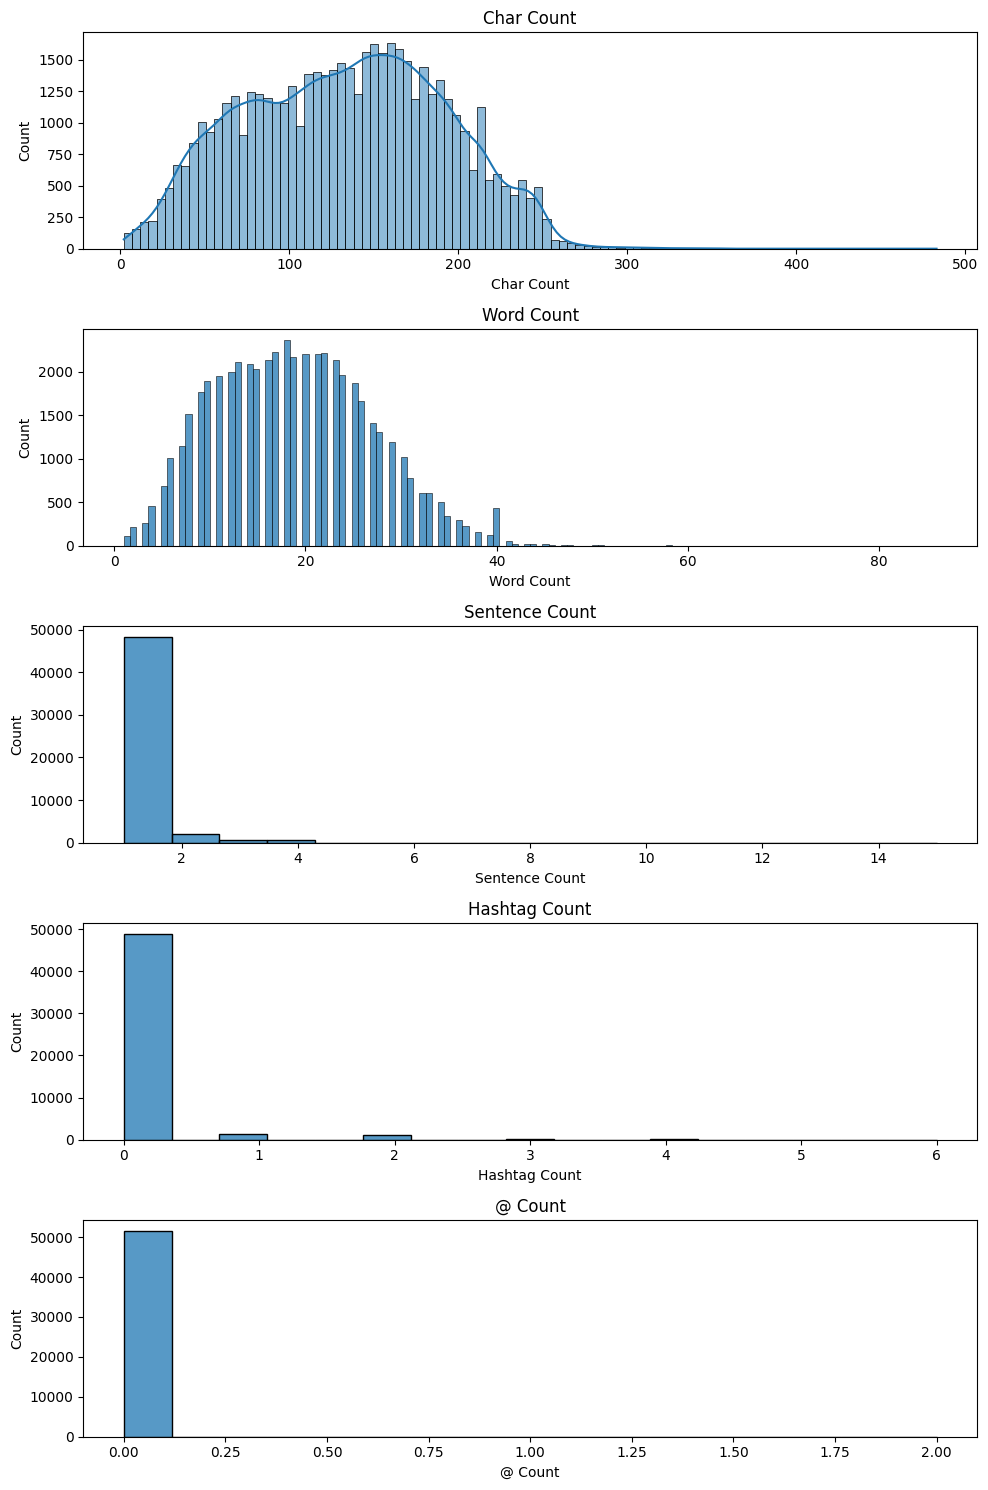

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con 5 subgráficos
fig, axes = plt.subplots(5, 1, figsize=(10, 15))

# Definir las columnas a graficar
columnas = ['Char Count', 'Word Count', 'Sentence Count', 'Hashtag Count', '@ Count']

# Crear gráficos KDE para cada columna y asignarlos a los subgráficos
for i, columna in enumerate(columnas):
    aux = i==0
    sns.histplot(data=products_descri_df, x=columna, ax=axes[i], kde=aux)
    axes[i].set_title(columna)

# Ajustar los espacios entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Normalización

In [22]:
from src import text_normalizer
stop_words = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pct3x\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pct3x\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pct3x\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [27]:
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,Compatible with select electronic devices; AAA...,95,12,1,0,0
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112,15,1,0,0
2,127687,Compatible with select electronic devices; AA ...,94,12,1,0,0
3,150115,4-pack AA alkaline batteries; battery tester i...,53,7,1,0,0
4,185230,Compatible with select electronic devices; C s...,93,12,1,0,0


In [29]:
products_descri_df['Descriptions'] = text_normalizer.normalize_corpus(products_descri_df['Descriptions'], stopwords=stop_words, text_lemmatization=True)
products_descri_df.head()

c:\Users\pct3x\OneDrive\Documentos\AnyoneAI\Final Project\e_commerce_categorization\src\text_normalizer.py:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  texto = BeautifulSoup(text, 'html.parser')


,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,compatible select electronic device aaa size d...,95,12,1,0,0
1,48530,long last energy duralock power preserve techn...,112,15,1,0,0
2,127687,compatible select electronic device aa size du...,94,12,1,0,0
3,150115,pack aa alkaline battery battery tester include,53,7,1,0,0
4,185230,compatible select electronic device c size dur...,93,12,1,0,0


In [30]:
# Guardamos para no tener que pasar por lo mismo
products_descri_df.to_csv('dataset/prod_descri_normalized.csv',index=False)

In [31]:
# leemos para no tener que pasar por lo mismo.
products_descri_df = pd.read_csv('dataset/prod_descri_normalized.csv')
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,compatible select electronic device aaa size d...,95,12,1,0,0
1,48530,long last energy duralock power preserve techn...,112,15,1,0,0
2,127687,compatible select electronic device aa size du...,94,12,1,0,0
3,150115,pack aa alkaline battery battery tester include,53,7,1,0,0
4,185230,compatible select electronic device c size dur...,93,12,1,0,0


## Conteo de palabras más frecuentes y palabras menos frecuentes.
* Creación de un corpus unidimensional a fin de realizar los conteos.

### Creación de un corpus unidimensional a fin de realizar los conteos.

In [32]:
corpus = [word for i in products_descri_df['Descriptions'].str.split().values.tolist() for word in i if (word not in stop_words)]

In [33]:
corpus[0:25]

['compatible',
 'select',
 'electronic',
 'device',
 'aaa',
 'size',
 'duralock',
 'power',
 'preserve',
 'technology',
 'pack',
 'long',
 'last',
 'energy',
 'duralock',
 'power',
 'preserve',
 'technology',
 'toy',
 'clock',
 'radio',
 'game',
 'remote',
 'pda',
 'compatible']

In [34]:
len(corpus)

803388

In [35]:
len(set(corpus))

18157

### Análisis de palabras más frecuentes

In [36]:
from nltk.probability import FreqDist
most_common = FreqDist(corpus).most_common(n=None)
most_common_df = pd.DataFrame(most_common, columns=['Word', 'Count'])
most_common_df.head()

,Word,Count
0,compatible,15683
1,design,9636
2,apple,6258
3,control,6093
4,power,5277


In [37]:
# Decidimos cuantas palabras deseamos plotear.
from nltk.probability import FreqDist
common_num = 60
most_common_plot = most_common_df[0:common_num+1].copy()
most_common_plot.head()

,Word,Count
0,compatible,15683
1,design,9636
2,apple,6258
3,control,6093
4,power,5277


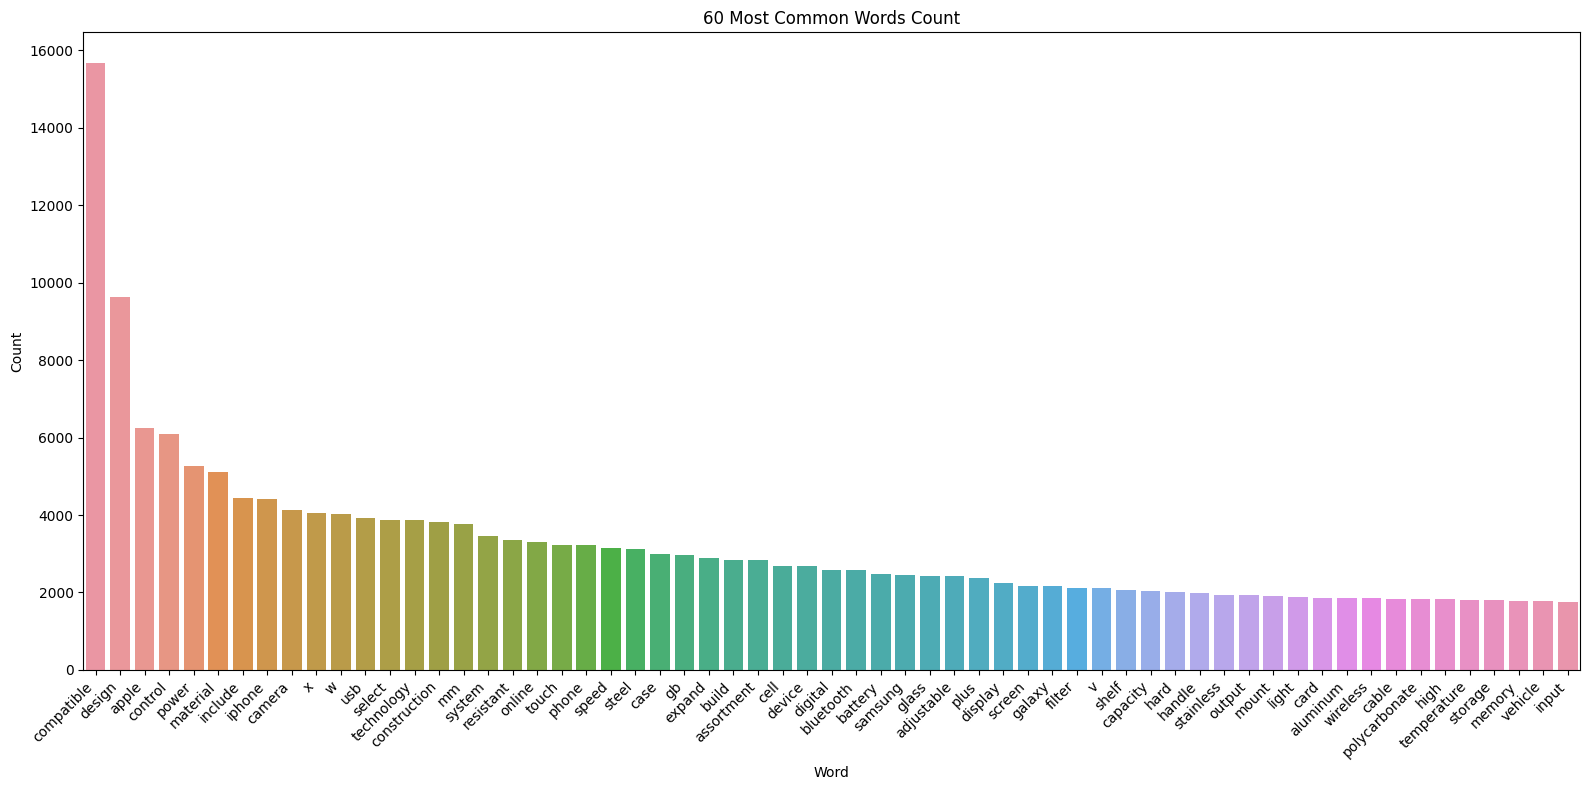

In [38]:
plt.figure(figsize=(16,8))
Title = f'{common_num} Most Common Words Count'
sns.barplot(data=most_common_plot, x='Word', y='Count')
plt.title(Title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Análisis de palabras menos frecuentes

In [39]:
least_common_df = most_common_df.sort_values('Count', ascending=True)
least_common_df.reset_index(inplace=True)
least_common_df.drop('index', axis=1, inplace=True)
least_common_df.head()

,Word,Count
0,hid,1
1,summers,1
2,wise,1
3,publication,1
4,berklee,1


In [40]:
# Decidimos cuantas palabras deseamos plotear.
common_num = 60
least_common_plot = least_common_df[0:common_num+1].copy()
least_common_plot.head()

,Word,Count
0,hid,1
1,summers,1
2,wise,1
3,publication,1
4,berklee,1


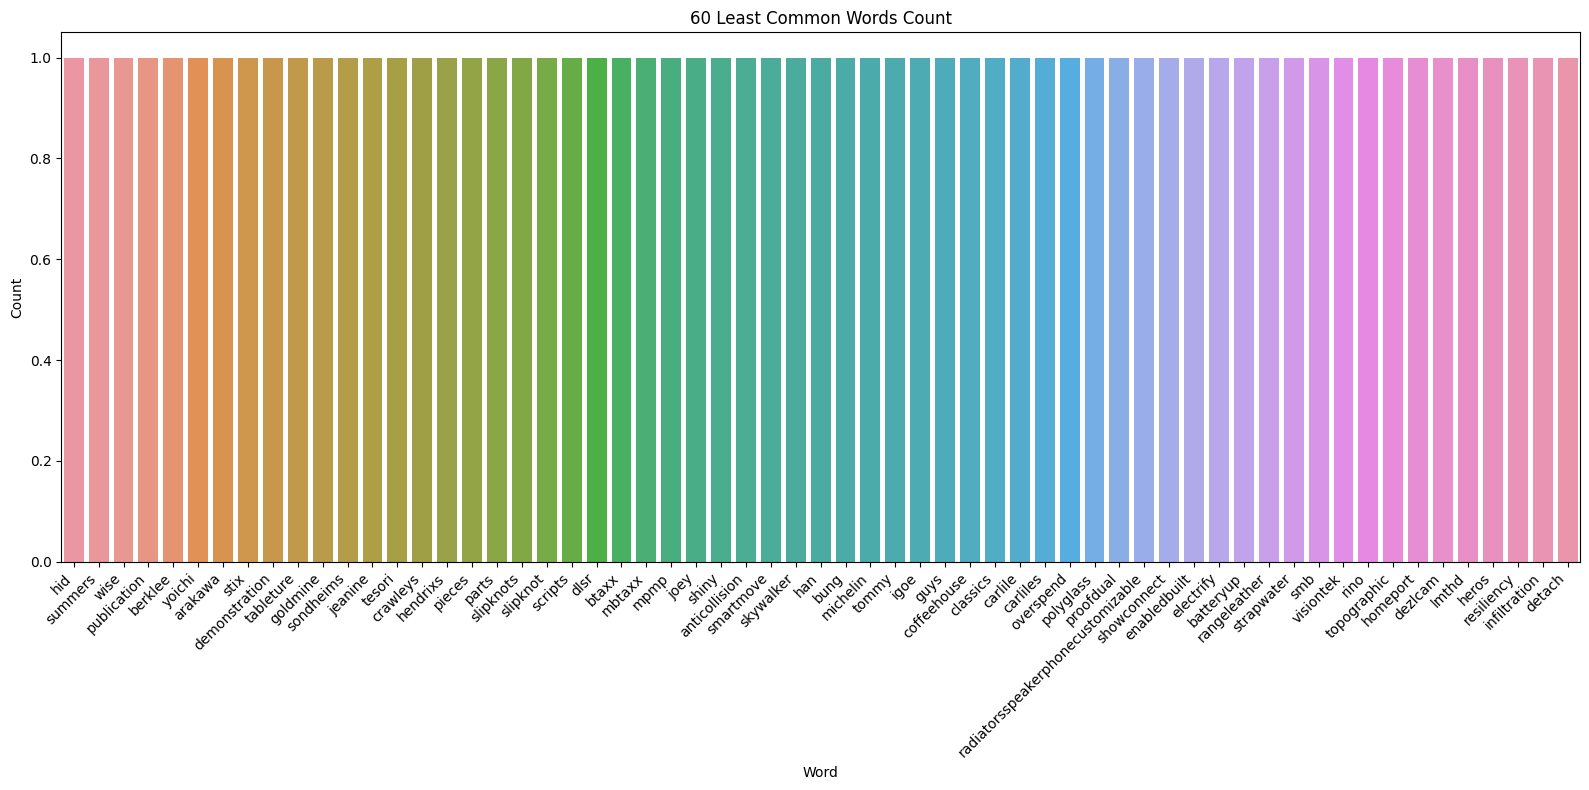

In [41]:
plt.figure(figsize=(16,8))
Title = f'{common_num} Least Common Words Count'
sns.barplot(data=least_common_plot, x='Word', y='Count')
plt.title(Title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
len(least_common_df[least_common_df['Count']==1])
# Existen 5339 palabras que solo se repiten una sola vez en todas las descripciones juntas.

5339

## Conteo de ngramas más frecuentes y menos frecuentes
* Ordenar products_df según número de palabras (Words Count)
* Determinar cantidad de números de palabras a agrupar.
* Dividir el dataframe no en partes iguales por líneas, sino en partes iguales según acumulación de palabras.
* Implementar el análisis de bigramas en cada parte.
* Implementar el análisis de trigramas en cada parte.

### Ordenar products_df según número de palabras (Words Count)

In [43]:
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,compatible select electronic device aaa size d...,95,12,1,0,0
1,48530,long last energy duralock power preserve techn...,112,15,1,0,0
2,127687,compatible select electronic device aa size du...,94,12,1,0,0
3,150115,pack aa alkaline battery battery tester include,53,7,1,0,0
4,185230,compatible select electronic device c size dur...,93,12,1,0,0


In [44]:
products_descri_df.sort_values('Word Count', inplace=True, ascending=False)
products_descri_df.reset_index(inplace=True, drop=True)
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,3721708,need help set learn basic new camera camcorder...,483,86,3,0,0
1,3630079,music make happy mp player make ecstatic geek ...,377,74,6,0,0
2,3721726,music make happy mp player make ecstatic geek ...,393,73,6,0,0
3,5352025,add comfort touch work z line design task chai...,358,61,5,0,0
4,1319418,geek squad installer quickly professionally co...,338,58,2,0,0


### Determinar cantidad de números de palabras a agrupar.

In [45]:
tot_palabras = products_descri_df['Word Count'].sum()
tot_palabras

970414

In [46]:
target_palabras = tot_palabras//8
target_palabras

121301

### Dividir el dataframe no en partes iguales por líneas, sino en partes iguales según acumulación de palabras.

In [47]:
dataframe_list = []

current_sum = 0
current_dataframe = pd.DataFrame(columns=products_descri_df.columns)

for index, row in products_descri_df.iterrows():
    current_sum += row['Word Count']
    current_dataframe = pd.concat([current_dataframe, pd.DataFrame(row).transpose()])

    if current_sum >= target_palabras:
        dataframe_list.append(current_dataframe)
        current_dataframe = pd.DataFrame(columns=products_descri_df.columns)
        current_sum = 0

In [48]:
if len(current_dataframe) > 0:
    dataframe_list.append(current_dataframe)

In [49]:
len(dataframe_list)

8

In [50]:
dataframe_list[0].head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,3721708,need help set learn basic new camera camcorder...,483,86,3,0,0
1,3630079,music make happy mp player make ecstatic geek ...,377,74,6,0,0
2,3721726,music make happy mp player make ecstatic geek ...,393,73,6,0,0
3,5352025,add comfort touch work z line design task chai...,358,61,5,0,0
4,1319418,geek squad installer quickly professionally co...,338,58,2,0,0


### Implementar el análisis de bigramas en cada parte.

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
def get_ngram_freq(n, df):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=(n,n))

    bow = vec.fit_transform(df['Descriptions'])

    count_values = bow.toarray().sum(axis=0)

    ngram_freq = pd.DataFrame([(count_values[i], k) for k, i in vec.vocabulary_.items()])
    ngram_freq.columns = ["frequency", "ngram"]
    ngram_freq.sort_values(by = "frequency",  ascending = False, inplace = True)

    return ngram_freq

In [52]:
bigram_dataframe = pd.DataFrame(columns=["frequency", "ngram"])

for dafra in dataframe_list:
    bigram_aux = get_ngram_freq(2, dafra)
    bigram_dataframe = pd.concat([bigram_dataframe, bigram_aux[0:1000]], axis=0)

bigram_dataframe.head()

,frequency,ngram
274,1161,best buy
2970,1113,gift card
2974,740,buy gift
1669,699,apple iphone
2984,386,puerto rico


In [53]:
len(bigram_dataframe)

8000

In [54]:
bigram_dataframe_grouped = bigram_dataframe.groupby('ngram').sum()
bigram_dataframe_grouped.sort_values('frequency', ascending=False, inplace=True)
bigram_dataframe_grouped.reset_index(inplace=True)
bigram_dataframe_grouped.head()

,ngram,frequency
0,apple iphone,3952
1,compatible apple,3040
2,expand online,2830
3,online assortment,2829
4,cell phone,2481


In [55]:
bigram_dataframe_grouped.tail()

,ngram,frequency
3891,way speaker,9
3892,broil system,9
3893,legendary story,9
3894,vacuum hepa,9
3895,technology vari,9


In [56]:
len(bigram_dataframe_grouped)

3896

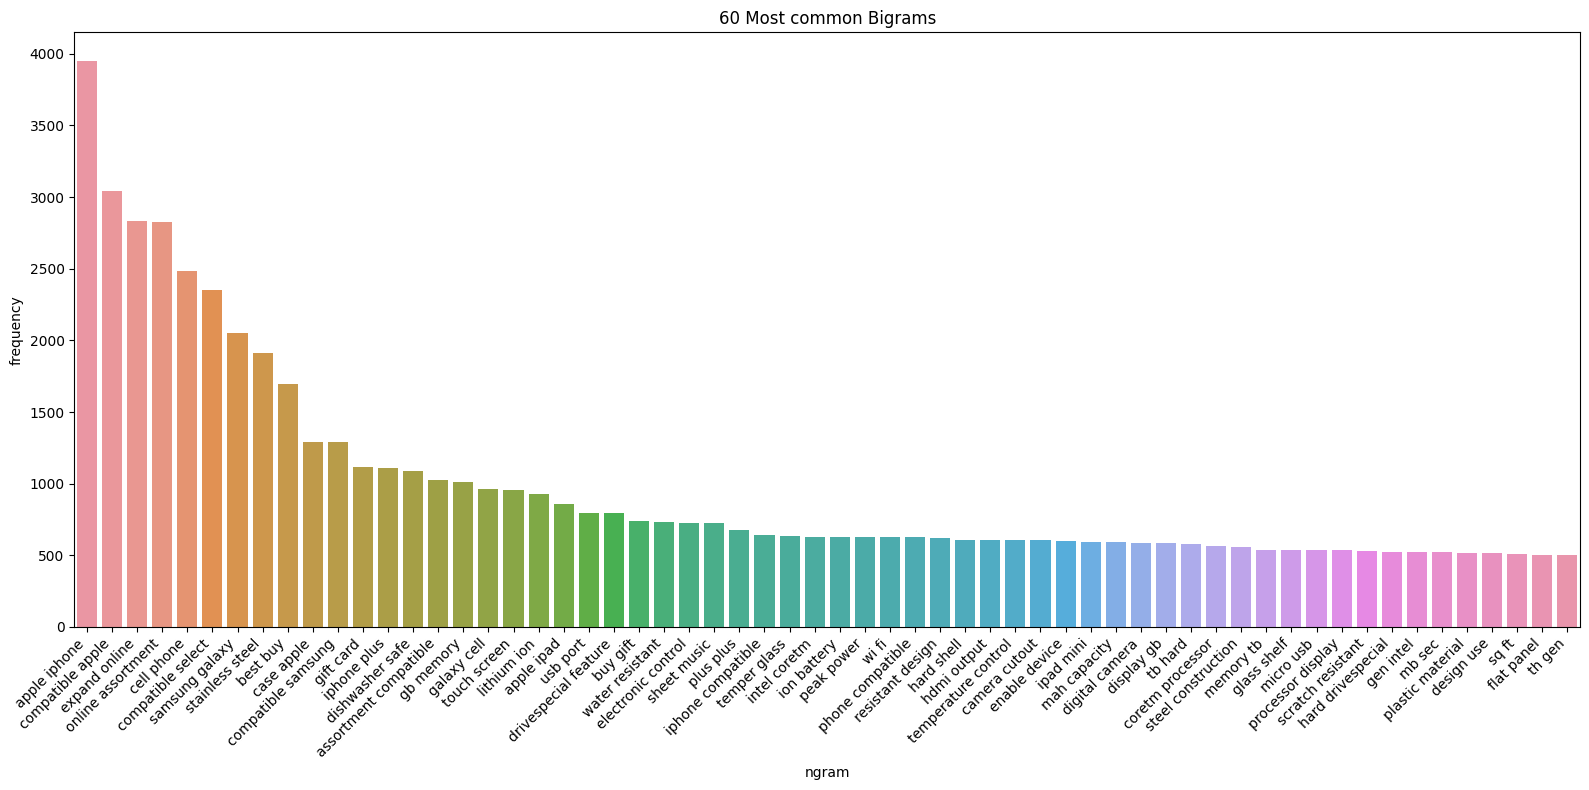

In [57]:
val_max = 60
ngram_grouped_plot = bigram_dataframe_grouped[0:val_max].copy()
title = f'{val_max} Most common Bigrams'
plt.figure(figsize=(16, 8))
sns.barplot(data=ngram_grouped_plot, x='ngram', y='frequency')
plt.title(title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Implementar el análisis de trigramas en cada parte.

In [58]:
trigram_dataframe = pd.DataFrame(columns=["frequency", "ngram"])

for dafra in dataframe_list:
    trigram_data_aux = get_ngram_freq(3, dafra)
    trigram_dataframe = pd.concat([trigram_dataframe, trigram_data_aux[0:1000]], axis=0)

trigram_dataframe.head()

,frequency,ngram
3179,740,buy gift card
3178,740,best buy gift
780,373,best buy store
3187,372,purchase online us
3188,372,online us puerto


In [59]:
len(trigram_dataframe)

8000

In [60]:
trigram_dataframe_grouped = trigram_dataframe.groupby('ngram').sum()
trigram_dataframe_grouped.sort_values('frequency', ascending=False, inplace=True)
trigram_dataframe_grouped.reset_index(inplace=True)
trigram_dataframe_grouped.head()

,ngram,frequency
0,expand online assortment,2829
1,compatible apple iphone,2069
2,compatible samsung galaxy,1238
3,case apple iphone,1137
4,online assortment compatible,1026


In [61]:
len(trigram_dataframe_grouped)

5163

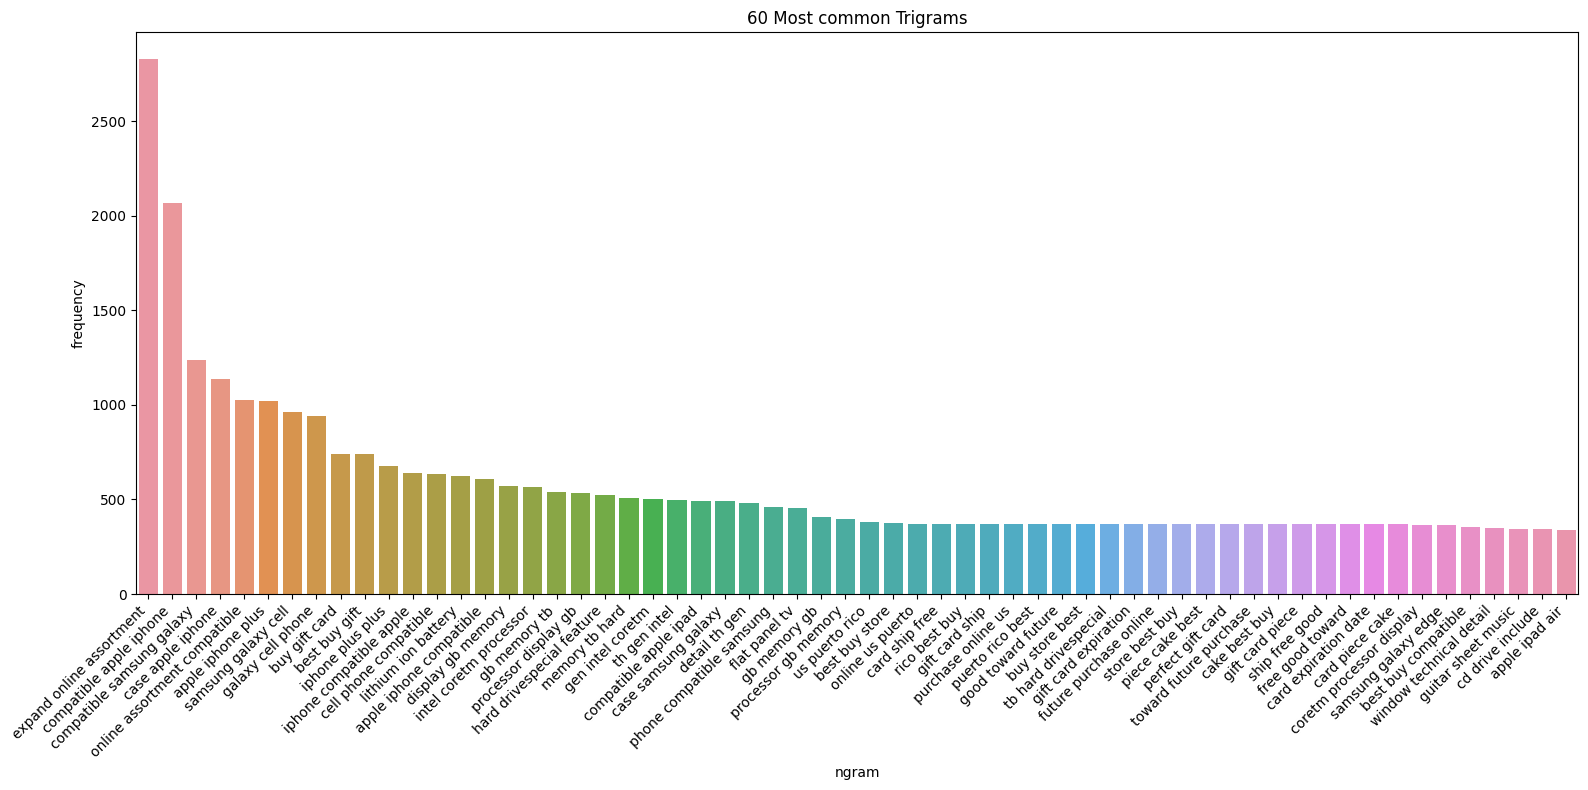

In [62]:
val_max = 60
ngram_grouped_plot = trigram_dataframe_grouped[0:val_max].copy()
title = f'{val_max} Most common Trigrams'
plt.figure(figsize=(16, 8))
sns.barplot(data=ngram_grouped_plot, x='ngram', y='frequency')
plt.title(title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Conteo de palabras de una sola letra.

In [63]:
most_common_df.head()

,Word,Count
0,compatible,15683
1,design,9636
2,apple,6258
3,control,6093
4,power,5277


In [64]:
most_common_single_letter = [[word, count] for word, count in zip(most_common_df['Word'], most_common_df['Count']) if len(word) == 1]
most_common_single_letter = pd.DataFrame(most_common_single_letter, columns=['Word', 'Count'])
most_common_single_letter.head()

,Word,Count
0,x,4064
1,w,4029
2,v,2106
3,g,1221
4,p,658


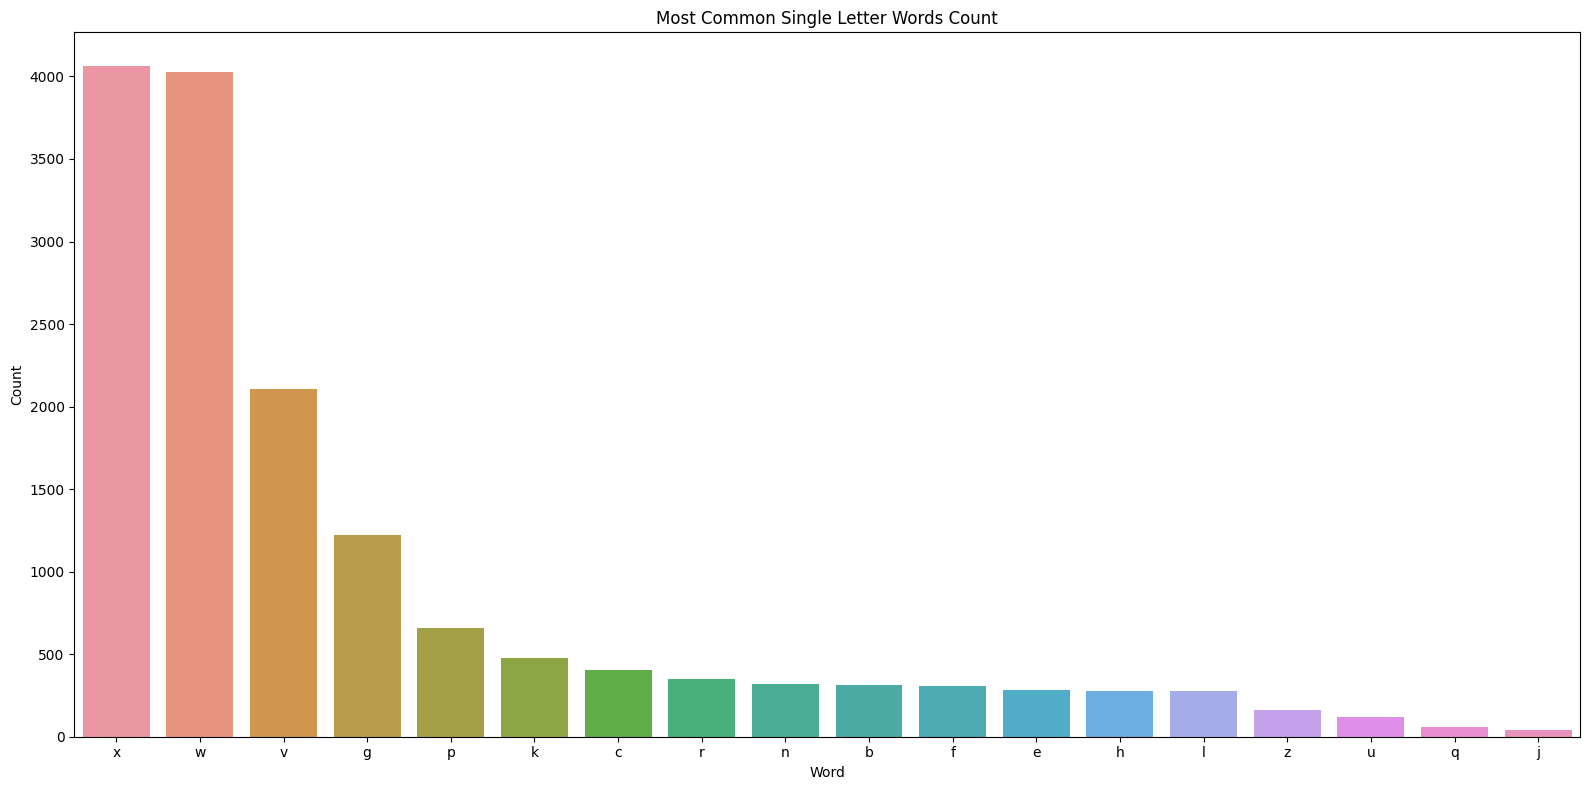

In [65]:
plt.figure(figsize=(16,8))
Title = 'Most Common Single Letter Words Count'
sns.barplot(data=most_common_single_letter, x='Word', y='Count')
plt.title(Title)
plt.tight_layout()
plt.show()

# Análisis de nombres
* Conteo de caracteres, de palabras de oraciones y caracteres especiales.
* Normalización
* Conteo de palabras más frecuentes y palabras menos frecuentes.
* Conteo de ngramas más frecuentes y menos frecuentes
* Conteo de palabras de una sola letra

### Análisis inicial

In [66]:
products_name_df.head()

,Skus,Name
0,43900,Duracell - AAA Batteries (4-Pack)
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack)
2,127687,Duracell - AA Batteries (8-Pack)
3,150115,Energizer - MAX Batteries AA (4-Pack)
4,185230,Duracell - C Batteries (4-Pack)


In [67]:
len(products_name_df)

51645

In [68]:
products_name_df.dtypes

Skus     int64
Name    object
dtype: object

In [69]:
products_name_df['Name'][0]

'Duracell - AAA Batteries (4-Pack)'

In [70]:
products_name_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51645 entries, 0 to 51645
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Skus    51645 non-null  int64 
 1   Name    51645 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.2+ MB


## Conteo de caracteres, de palabras de oraciones y caracteres especiales.

### Conteo de caracteres

In [71]:
products_name_df['Char Count'] = products_name_df['Name'].apply(len)
products_name_df.head()

,Skus,Name,Char Count
0,43900,Duracell - AAA Batteries (4-Pack),33
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47
2,127687,Duracell - AA Batteries (8-Pack),32
3,150115,Energizer - MAX Batteries AA (4-Pack),37
4,185230,Duracell - C Batteries (4-Pack),31


### Conteo de palabras

In [72]:
def cant_palabras(oracion):
    palabras = oracion.split()
    cantidad = len(palabras)
    return cantidad
products_name_df['Word Count'] = products_name_df['Name'].apply(cant_palabras)
products_name_df.head()

,Skus,Name,Char Count,Word Count
0,43900,Duracell - AAA Batteries (4-Pack),33,5
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47,7
2,127687,Duracell - AA Batteries (8-Pack),32,5
3,150115,Energizer - MAX Batteries AA (4-Pack),37,6
4,185230,Duracell - C Batteries (4-Pack),31,5


### Conteo de oraciones

In [73]:
import nltk
from nltk.tokenize import sent_tokenize
def cant_oraciones(descripcion):
    cant_oracion = len(sent_tokenize(descripcion))
    return cant_oracion

products_name_df['Sentence Count'] = products_name_df['Name'].apply(cant_oraciones)
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count
0,43900,Duracell - AAA Batteries (4-Pack),33,5,1
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47,7,1
2,127687,Duracell - AA Batteries (8-Pack),32,5,1
3,150115,Energizer - MAX Batteries AA (4-Pack),37,6,1
4,185230,Duracell - C Batteries (4-Pack),31,5,1


### Conteo de caracteres especiales

In [74]:
products_name_df['Hashtag Count'] = products_name_df['Name'].map(lambda x: x.count("#"))
products_name_df['@ Count'] = products_name_df['Name'].map(lambda x: x.count("@"))
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,Duracell - AAA Batteries (4-Pack),33,5,1,0,0
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47,7,1,0,0
2,127687,Duracell - AA Batteries (8-Pack),32,5,1,0,0
3,150115,Energizer - MAX Batteries AA (4-Pack),37,6,1,0,0
4,185230,Duracell - C Batteries (4-Pack),31,5,1,0,0


### Gráfico de lo desarrollado

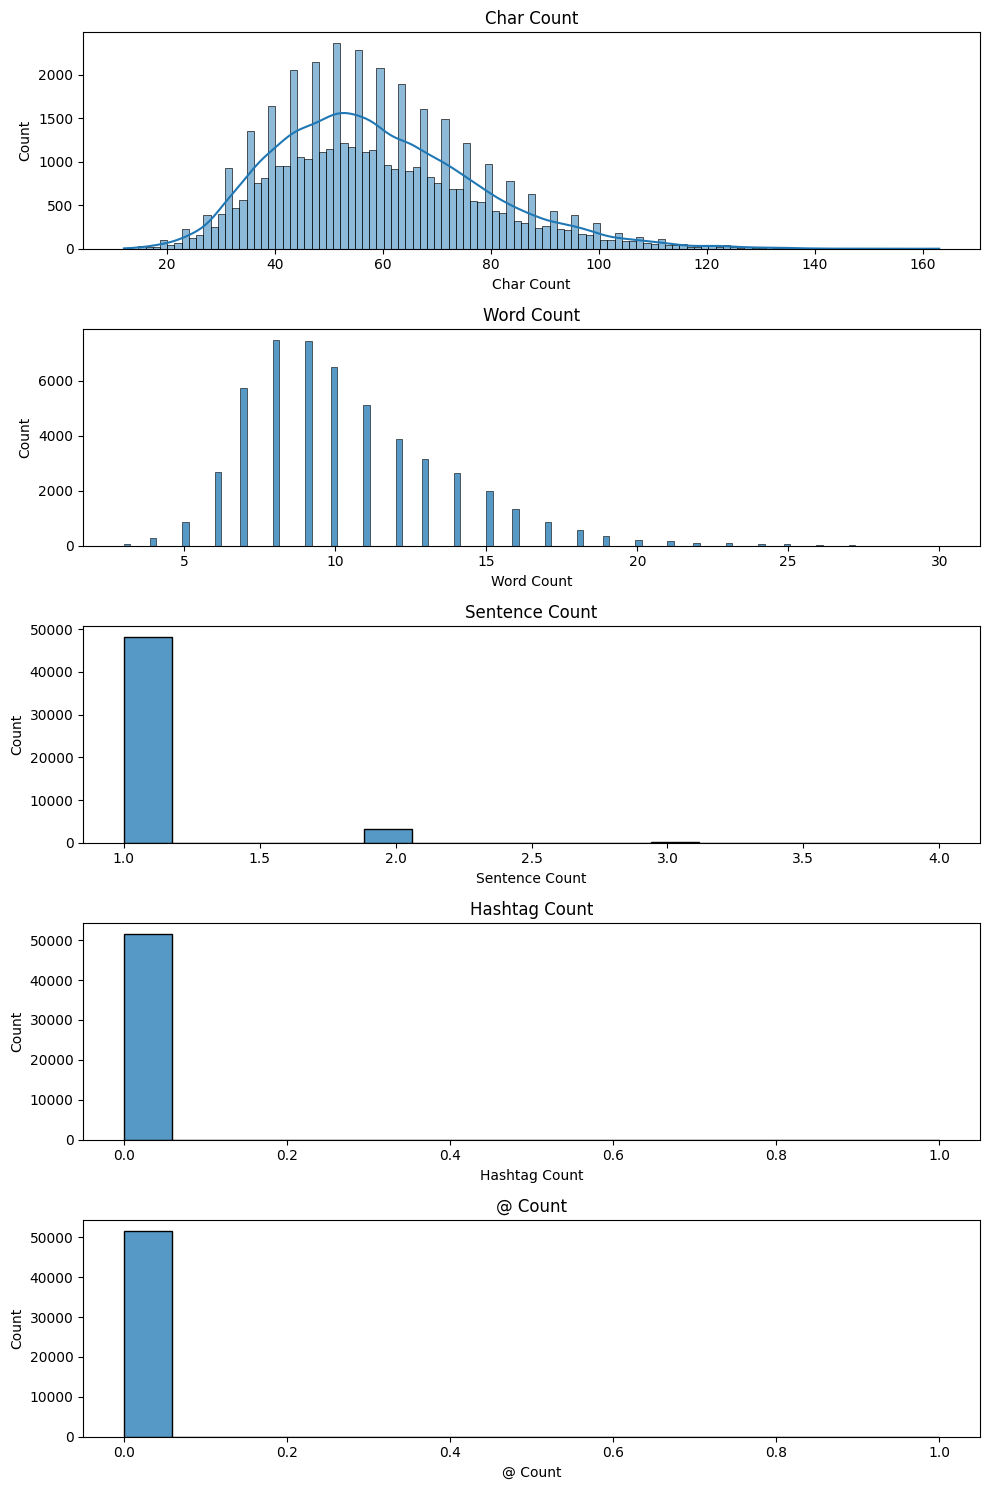

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con 5 subgráficos
fig, axes = plt.subplots(5, 1, figsize=(10, 15))

# Definir las columnas a graficar
columnas = ['Char Count', 'Word Count', 'Sentence Count', 'Hashtag Count', '@ Count']

# Crear gráficos KDE para cada columna y asignarlos a los subgráficos
for i, columna in enumerate(columnas):
    aux = i==0
    sns.histplot(data=products_name_df, x=columna, ax=axes[i], kde=aux)
    axes[i].set_title(columna)

# Ajustar los espacios entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Normalización

In [76]:
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,Duracell - AAA Batteries (4-Pack),33,5,1,0,0
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47,7,1,0,0
2,127687,Duracell - AA Batteries (8-Pack),32,5,1,0,0
3,150115,Energizer - MAX Batteries AA (4-Pack),37,6,1,0,0
4,185230,Duracell - C Batteries (4-Pack),31,5,1,0,0


In [77]:
products_name_df['Name'] = text_normalizer.normalize_corpus(products_name_df['Name'], stopwords=stop_words, text_lemmatization=True)
products_name_df.head()

c:\Users\pct3x\OneDrive\Documentos\AnyoneAI\Final Project\e_commerce_categorization\src\text_normalizer.py:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  texto = BeautifulSoup(text, 'html.parser')


,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,duracell aaa batteries pack,33,5,1,0,0
1,48530,duracell aa v coppertop batteries pack,47,7,1,0,0
2,127687,duracell aa batteries pack,32,5,1,0,0
3,150115,energizer max batteries aa pack,37,6,1,0,0
4,185230,duracell c batteries pack,31,5,1,0,0


In [78]:
# Guardamos para no tener que pasar por lo mismo
products_name_df.to_csv('dataset/prod_names_normalized.csv',index=False)

In [79]:
# leemos para no tener que pasar por lo mismo.
products_name_df = pd.read_csv('dataset/prod_names_normalized.csv')
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,duracell aaa batteries pack,33,5,1,0,0
1,48530,duracell aa v coppertop batteries pack,47,7,1,0,0
2,127687,duracell aa batteries pack,32,5,1,0,0
3,150115,energizer max batteries aa pack,37,6,1,0,0
4,185230,duracell c batteries pack,31,5,1,0,0


## Conteo de palabras más frecuentes y palabras menos frecuentes.

## Conteo de ngramas más frecuentes y menos frecuentes

## Conteo de palabras de una sola letra

# Análisis de categorías

# Análisis de Categorías
* Verificar las categorías del dataset categories.
* Verificar también las categorías del dataset products.
* Analizar cuales categorías son más frecuentes.
* Analizar cuales categorías son menos frecuentes.

In [80]:
for i, prod in enumerate(products):
    if i == 4:
        break
    name = prod['name']
    print(f'\n¡¡¡¡Datos del producto {name}!!!!')
    for key, value in prod.items():
        print(key, ":", value)


¡¡¡¡Datos del producto Duracell - AAA Batteries (4-Pack)!!!!
sku : 43900
name : Duracell - AAA Batteries (4-Pack)
type : HardGood
price : 5.49
upc : 041333424019
category : [{'id': 'pcmcat312300050015', 'name': 'Connected Home & Housewares'}, {'id': 'pcmcat248700050021', 'name': 'Housewares'}, {'id': 'pcmcat303600050001', 'name': 'Household Batteries'}, {'id': 'abcat0208002', 'name': 'Alkaline Batteries'}]
shipping : 5.49
description : Compatible with select electronic devices; AAA size; DURALOCK Power Preserve technology; 4-pack
manufacturer : Duracell
model : MN2400B4Z
url : http://www.bestbuy.com/site/duracell-aaa-batteries-4-pack/43900.p?id=1051384074145&skuId=43900&cmp=RMXCC
image : http://img.bbystatic.com/BestBuy_US/images/products/4390/43900_sa.jpg

¡¡¡¡Datos del producto Duracell - AA 1.5V CopperTop Batteries (4-Pack)!!!!
sku : 48530
name : Duracell - AA 1.5V CopperTop Batteries (4-Pack)
type : HardGood
price : 5.49
upc : 041333415017
category : [{'id': 'pcmcat312300050015', 

In [81]:
products_categories = []
for prod in products:
    var = [prod['sku'], prod['category']]
    products_categories.append(var)

products_categories_df = pd.DataFrame(products_categories, columns=['Skus', 'Category'])
products_categories_df.head()

,Skus,Category
0,43900,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
1,48530,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
2,127687,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
3,150115,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
4,185230,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."


In [82]:
categorias_list = [cat for element in products_categories_df['Category'] for cat in element]
categorias_list[0:3]

[{'id': 'pcmcat312300050015', 'name': 'Connected Home & Housewares'},
 {'id': 'pcmcat248700050021', 'name': 'Housewares'},
 {'id': 'pcmcat303600050001', 'name': 'Household Batteries'}]

In [83]:
categorias_list = []
categorias_list = [cat.values() for element in products_categories_df['Category'] for cat in element]
categorias_list[0:3]

[dict_values(['pcmcat312300050015', 'Connected Home & Housewares']),
 dict_values(['pcmcat248700050021', 'Housewares']),
 dict_values(['pcmcat303600050001', 'Household Batteries'])]

In [84]:
categorias_df = pd.DataFrame(categorias_list, columns=['ID', 'Name'])
categorias_df.head()

,ID,Name
0,pcmcat312300050015,Connected Home & Housewares
1,pcmcat248700050021,Housewares
2,pcmcat303600050001,Household Batteries
3,abcat0208002,Alkaline Batteries
4,pcmcat312300050015,Connected Home & Housewares


In [85]:
categorias_set_df = categorias_df.drop_duplicates()
categorias_set_df.reset_index(drop=True)
print((len(set(categorias_set_df['ID'])), len(set(categorias_set_df['Name']))))

(1857, 1802)


### Esto nos dice que hay varios casos en los que el nombre es el mismo pero tienen IDs distintos. Se han creado IDs distintos cuando pudieron haberlo puesto bajo el mismo ID. Debemos detectar estos casos. Probablemente fueron errores humanos.

In [86]:
duplicados = categorias_set_df[categorias_set_df.duplicated('Name', keep=False)]
duplicados

,ID,Name
165,pcmcat151600050037,Keyboards
170,pcmcat152100050038,Microphones
400,abcat0204000,Headphones
450,abcat0507009,Power Supplies
473,pcmcat378800050014,Accessories
...,...,...
160221,pcmcat147400050001,Card & Puzzle
160958,pcmcat147400050009,Sports & Outdoors
161388,pcmcat152100050036,Headphones
170178,abcat0107033,Subwoofer Cables


In [87]:
same_name_IDs = duplicados.groupby('Name')['ID'].unique().reset_index()
same_name_IDs

,Name,ID
0,Accessories,"[pcmcat378800050014, pcmcat96200050046, pcmcat..."
1,Action & Adventure,"[pcmcat147400050000, abcat0701003, abcat070700..."
2,Aluminum Tripods,"[pcmcat240400050039, pcmcat241300050041]"
3,Apple Watch,"[pcmcat748300489081, pcmcat748300489175]"
4,Bluetooth & Wireless Speakers,"[pcmcat310200050004, abcat0205009]"
5,Brother,"[pcmcat152600050013, abcat0807002, abcat0807010]"
6,Cables & Connectors,"[pcmcat165900050026, abcat0515012]"
7,Canon,"[abcat0807003, pcmcat140900050016, pcmcat15510..."
8,Card & Puzzle,"[pcmcat147000050063, pcmcat147400050001]"
9,Coffee Makers,"[abcat0912005, abcat0912009]"


In [88]:
same_IDs_name = duplicados.groupby('ID')['Name'].unique().reset_index()
same_IDs_name

,ID,Name
0,abcat0102008,[Portable DVD Players]
1,abcat0106001,[TV Stands]
2,abcat0106012,[Small]
3,abcat0106013,[Medium]
4,abcat0106014,[Large]
...,...,...
107,pcmcat385200050003,[Disney Infinity]
108,pcmcat748300489081,[Apple Watch]
109,pcmcat748300489175,[Apple Watch]
110,pcmcat748301666245,[Portable Speakers]


In [95]:
li = []
bandera = False
for elemento in same_IDs_name['Name']:
    cont = 0
    for cat in elemento:
        cont+= 1
        if cont > 1:
            bandera=True
        li.append(cat)

li_unique = set(li)
bandera

False

# ¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡Verificar también si existen IDs apuntando a varios nombres de categoría.!!!!!!!!!!!!!!!!!!

In [137]:
same_name_IDs.to_csv('dataset/same_name_dif_IDs.csv', index=False)

### Cualquiera de los IDs que corresponden a la misma fila, deben ser asignados a la misma categoría.

In [118]:
categorias_df_conteo = categorias_df.groupby('Name').count()
categorias_df_conteo.reset_index(inplace=True)
categorias_df_conteo.columns=['Name', 'Count']
categorias_df_conteo.sort_values('Count', ascending=False, inplace=True)
categorias_df_conteo.reset_index(inplace=True, drop=True)
categorias_df_conteo

,Name,Count
0,Appliances,9317
1,Cell Phones,6905
2,Cell Phone Accessories,6176
3,Computers & Tablets,6088
4,Video Games,5837
...,...,...
1797,Installation & Conversion Kits,1
1798,Ink,1
1799,Incandescent Light Bulbs,1
1800,Image Softening Filters,1


In [98]:
len(categorias_df)

179691

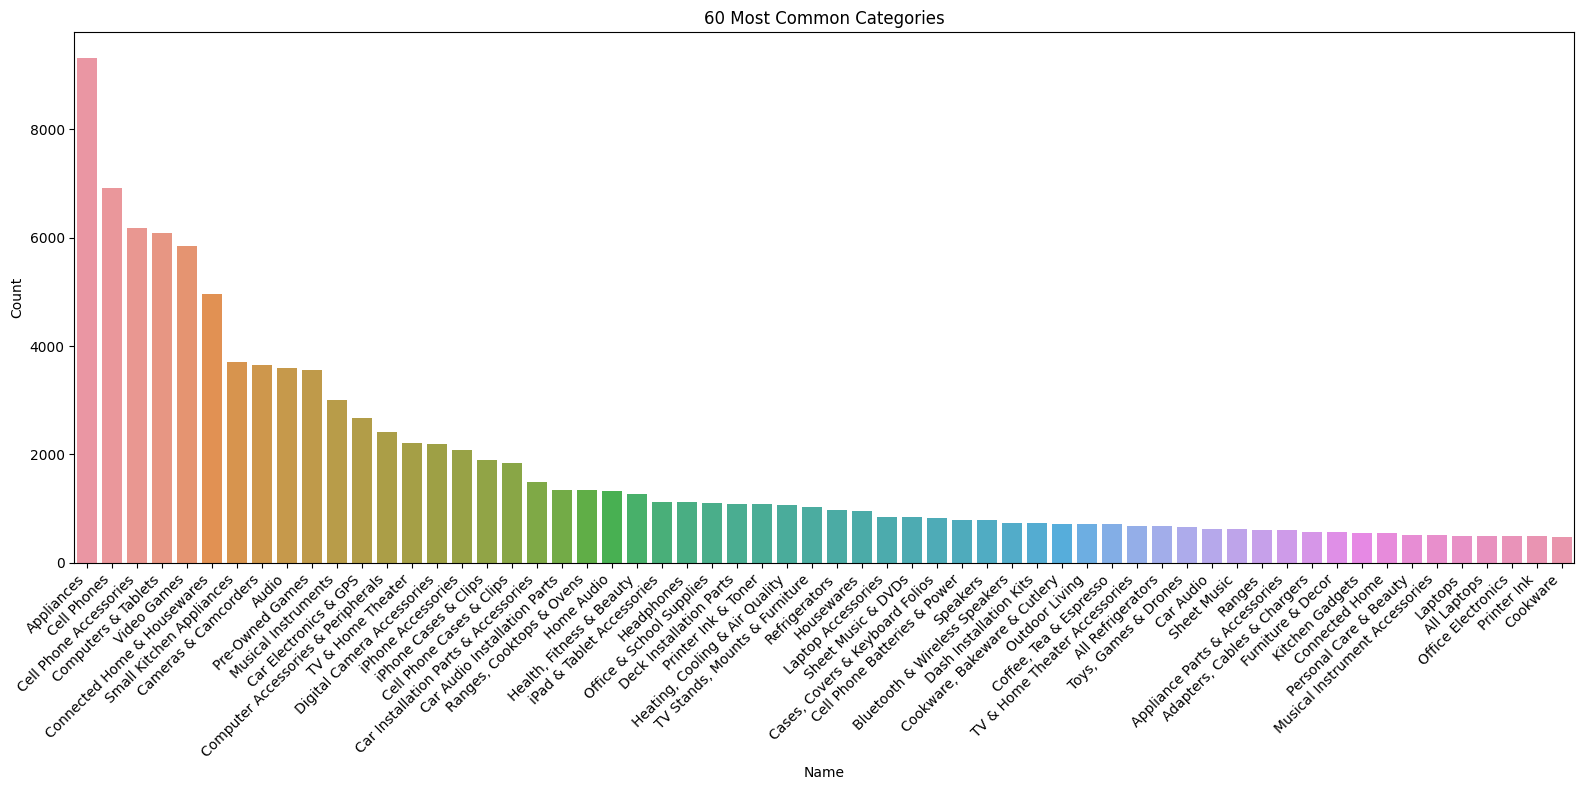

In [121]:
cant_var = 60
categorias_df_plot = categorias_df_conteo[0:cant_var].copy()
title=f'{cant_var} Most Common Categories'
plt.figure(figsize=(16,8))
sns.barplot(data=categorias_df_plot, x='Name', y='Count')
plt.title(title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [122]:
categorias_df_conteo.sort_values('Count', ascending=True, inplace=True)
categorias_df_conteo

,Name,Count
1801,Light Dimmers & Controls,1
1645,Carbon Fiber Tripods,1
1644,Casino,1
1643,Cassette Adapters,1
1642,Cell Phone Docks,1
...,...,...
4,Video Games,5837
3,Computers & Tablets,6088
2,Cell Phone Accessories,6176
1,Cell Phones,6905


In [123]:
len(categorias_df_conteo[categorias_df_conteo['Count']==1])

243

### Existen 243 categorías que han sido utilizadas solo una vez.

# ¡¡¡¡¡¡¡¡¡¡Crear base de datos de imágenes.!!!!!!!!!!!!!!!!!!!!

# ¡¡¡¡¡¡¡¡ UTILIZAR CLUSTERIZACIÓN PARA VER COMO COMBINAR LAS CLASES QUE TIENEN MUY POQUITA APARICION!!!!!!!!!!!!!!!!

'''
* KMEANS
* CLARA
* DBSCAN
* LDA
* BERT EMBEDINGS FOR CLUSTERIZATION
'''

# Creación de modelos de base
* Crear nuestro conjunto X, y.
* Dividir en X_train, y_train, X_test, y_test, X_val, y_val
* Seleccionar varios modelos a probar y entrenar cada modelo.
* Estudio de métricas en cada caso.

## Crear nuestro conjunto X, y.


### Creación de y

(1857, 1802)


## Dividir en X_train, y_train, X_test, y_test, X_val, y_val


## Seleccionar varios modelos a probar y entrenar cada modelo.


## Estudio de métricas en cada caso.